# Libs and Paths

In [1]:
import os
os.chdir("/Users/finlayduff/Documents/BATH MSc/Dissertation")

In [2]:
from utils.data.results import load_combined_results

In [3]:
dataset_name = "FA-KES_10"
# experiment_id = "b7daf879-2120-4941-93bb-8533b910d1df"
# experiment_id = "eb741518-88e7-4245-b76b-8864e8cd9e18"
# experiment_id = "0f5045c4-5aa8-4866-a58e-ac969fc1d672"
experiment_id = '138d251a-21a3-49c9-b305-23d5440ce257'

# dataset_name = "recovery-news-data_100"
# experiment_id = "6277d39b-d2f6-4944-a953-fde69e80ef43"


In [4]:
df = load_combined_results(dataset_name=dataset_name, experiment_id=experiment_id)

In [6]:
import plotly.express as px

# Scatter plot
fig = px.scatter(
    df,
    x="classification_prompt_user_content_length",
    y="eval_score",
    title="Correlation Between User Content Length and Accuracy",
    labels={
        "classification_prompt_user_content_length": "User Content Length",
        "eval_score": "Accuracy (Eval Score)"
    },
    opacity=0.7
)

# Update layout for better visualization
fig.update_traces(marker=dict(color="blue", size=10))
fig.update_layout(
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    template="plotly_white"
)

fig.show()

## 1. Accuracy

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df["actual"], df["prediction"])
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.600


## ✅ 2. Precision, Recall, F1 Score

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(df["actual"], df["prediction"])
recall = recall_score(df["actual"], df["prediction"])
f1 = f1_score(df["actual"], df["prediction"])

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Precision: 0.553
Recall:    0.356
F1 Score:  0.433


## ✅ 3. Confusion Matrix


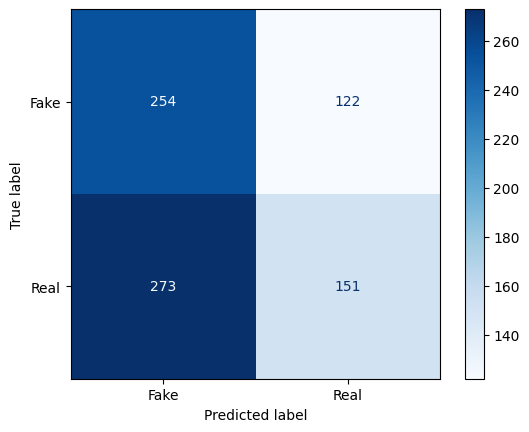

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df["actual"], df["prediction"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap="Blues")

## ✅ 4. ROC-AUC Score 

In [10]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(df["actual"], df["confidence"])
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.504


# Classification Report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(df["actual"], df["prediction"], target_names=["Real", "Fake"]))

              precision    recall  f1-score   support

        Real       0.48      0.68      0.56       376
        Fake       0.55      0.36      0.43       424

    accuracy                           0.51       800
   macro avg       0.52      0.52      0.50       800
weighted avg       0.52      0.51      0.49       800



# Experiment comparison

In [1]:
import os
os.chdir("/Users/finlayduff/Documents/BATH MSc/Dissertation")

In [2]:
import pandas as pd
import numpy as np
from utils.data.results import analyze_experiments
import plotly.express as px
# Load all experiment results
results_df = analyze_experiments(verbose=False)



/Users/finlayduff/.pyenv/versions/3.10.4/envs/fakenews_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/finlayduff/.pyenv/versions/3.10.4/envs/fakenews_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [3]:
latest_experiments = results_df.sort_values("start_time").groupby(["experiment_name","dataset"]).last()
latest_experiments_reset = latest_experiments.reset_index()

In [4]:
results_df.loc[(results_df['dataset'] == 'recovery-news-data_100') & (results_df['experiment_name'] == 'bulk_signals_condensed_gpt4')].sort_values("start_time",ascending=False)

,dataset,experiment_id,experiment_name,start_time,accuracy,precision,recall,f1,true_negatives,false_positives,false_negatives,true_positives
95,recovery-news-data_100,317813d4-966b-4f7b-a7ba-da6729251dfd,bulk_signals_condensed_gpt4,2025-04-26T13:09:53.458281+00:00,0.68,0.660714,0.74,0.698113,31,19,13,37
88,recovery-news-data_100,33414d8b-bfbe-47ed-bcbc-a2ffd1e5d6d8,bulk_signals_condensed_gpt4,2025-04-26T12:25:39.226618+00:00,0.69,0.666667,0.76,0.710280,31,19,12,38
97,recovery-news-data_100,f99a4cb1-58fd-491c-af05-eb932e82bc55,bulk_signals_condensed_gpt4,2025-04-26T12:17:50.470286+00:00,0.69,0.661017,0.78,0.715596,30,20,11,39
90,recovery-news-data_100,cc0667a6-a8aa-41f1-9713-b82edf36f0ed,bulk_signals_condensed_gpt4,2025-04-26T11:46:46.019739+00:00,0.72,0.677419,0.84,0.750000,30,20,8,42
84,recovery-news-data_100,4ce85088-89ba-45ae-ad88-9a2f77af7a66,bulk_signals_condensed_gpt4,2025-04-26T10:11:47.802391+00:00,0.71,0.677966,0.80,0.733945,31,19,10,40
93,recovery-news-data_100,b7b36455-9a35-4071-a0dd-3a5455ffac17,bulk_signals_condensed_gpt4,2025-04-23T15:24:15.033745+00:00,0.73,0.676923,0.88,0.765217,29,21,6,44
91,recovery-news-data_100,8a896ac3-e627-4aa6-93b7-c0c8b3ba1048,bulk_signals_condensed_gpt4,2025-04-23T11:04:04.677789+00:00,0.71,0.698113,0.74,0.718447,34,16,13,37
92,recovery-news-data_100,bf1a316a-4a03-4dc3-b291-ac6a2a710315,bulk_signals_condensed_gpt4,2025-04-23T10:51:30.181119+00:00,0.68,0.680000,0.68,0.680000,34,16,16,34
87,recovery-news-data_100,551b68b9-ec32-4ab8-bc48-6e1b34109744,bulk_signals_condensed_gpt4,2025-04-23T10:32:30.020128+00:00,0.70,0.692308,0.72,0.705882,34,16,14,36


In [5]:
# Create a bar plot
fig = px.bar(
    latest_experiments_reset,
    x="experiment_name",
    y="f1",
    color="dataset",
    barmode="group",
    title="F1 Scores per Dataset and Experiment Name",
    labels={"f1": "F1 Score", "experiment_name": "Experiment Name", "dataset": "Dataset"}
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [6]:
# Create a bar plot
fig = px.bar(
    latest_experiments_reset,
    x="experiment_name",
    y="precision",
    color="dataset",
    barmode="group",
    title="Precision per Dataset and Experiment Name",
    labels={"precision": "Precision", "experiment_name": "Experiment Name", "dataset": "Dataset"}
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [7]:
# Create a bar plot
fig = px.bar(
    latest_experiments_reset,
    x="experiment_name",
    y="recall",
    color="dataset",
    barmode="group",
    title="Recall per Dataset and Experiment Name",
    labels={"recall": "Recall", "experiment_name": "Experiment Name", "dataset": "Dataset"}
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [8]:
# Create a bar plot
fig = px.bar(
    latest_experiments_reset,
    x="experiment_name",
    y="accuracy",
    color="dataset",
    barmode="group",
    title="Accuracy per Dataset and Experiment Name",
    labels={"accuracy": "Accuracy", "experiment_name": "Experiment Name", "dataset": "Dataset"}
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [10]:
# # Create a bar plot
# fig = px.bar(
#     latest_experiments_reset,
#     x="experiment_name",
#     y="roc_auc",
#     color="dataset",
#     barmode="group",
#     title="ROC AUC per Dataset and Experiment Name",
#     labels={"roc_auc": "ROC AUC", "experiment_name": "Experiment Name", "dataset": "Dataset"}
# )

# fig.update_layout(xaxis_tickangle=-45)
# fig.show()

In [11]:
# Add new cell with markdown:
"""# Confusion Matrices for All Experiments"""

# Add new code cell:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get unique combinations of experiments and datasets

dataset_name = "recovery-news-data_100"
dataset_experiments = latest_experiments_reset[latest_experiments_reset['dataset'] == dataset_name]
experiment_combos = dataset_experiments.groupby(['experiment_name', 'dataset'])


# Calculate number of rows and columns needed for subplots
n_plots = len(experiment_combos)
n_cols = min(2, n_plots)  # Max 2 columns
n_rows = (n_plots + 1) // 2  # Ceiling division for number of rows

# Create subplot figure
fig = make_subplots(
    rows=n_rows, 
    cols=n_cols,
    subplot_titles=[f"{exp}_{ds}" for exp, ds in experiment_combos.groups.keys()]
)

# Create confusion matrix for each experiment
for idx, ((exp_name, dataset), group) in enumerate(experiment_combos):
    row = idx // 2 + 1
    col = idx % 2 + 1
    
    # Create confusion matrix
    cm = np.array([
        [group['true_negatives'].iloc[0], group['false_positives'].iloc[0]],
        [group['false_negatives'].iloc[0], group['true_positives'].iloc[0]]
    ])
    
    # Add heatmap
    fig.add_trace(
        go.Heatmap(
            z=cm,
            x=['Fake', 'Real'],
            y=['Fake', 'Real'],
            text=cm,
            texttemplate="%{text}",
            textfont={"size": 14},
            colorscale='Blues',
            showscale=False,
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=400 * n_rows,
    width=1000,
    title_text="Confusion Matrices for All Experiments",
    showlegend=False
)

# Update axes labels
for i in range(1, n_plots + 1):
    fig.update_xaxes(title_text="Predicted", row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig.update_yaxes(title_text="Actual", row=(i-1)//2 + 1, col=(i-1)%2 + 1)

fig.show()

# Token Count impact on Precision

In [7]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base")    # GPT-3.5/4 encoding

# token_counts = [len(enc.encode(p)) for p in all_prompts]

In [8]:
token_count = len(enc.encode("THIS IS A TEST PROMPT"))

In [10]:
enc.encode("THIS IS A TEST PROMPT")

[37012, 3507, 362, 13916, 68788, 2898]